# Exploratory Data Analysis
### Signal EDA

This file visualizes trends in the voltage, current and power waveforms constructed from the input data

* Due to the size of the data (~80K rows, ~140 features, 80+MB), data was randomly sampled to reduce its size and fit into memory (load_data.PreProcessing)
* Some basic EDA has been provided to introduce this subset of data. However full data exploration may be found on multi_class_EDA.
* Findings inform pre-processing pipeline and final model selection

### Dependencies

In [1]:
from dotenv import load_dotenv
import sys
import warnings

from __init__ import get_base_path
import data.load_data as load_data
from notebooks.signal import Signal

import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

load_dotenv()
warnings.filterwarnings('ignore')

/Users/kaimazurczyk/Desktop/power-grid-time-series-classification


In [2]:
random_seed = int(os.getenv('RANDOM_SEED'))
random_seed

42

### Read & Describe Dataframe

In [3]:
# csv_file = load_data.combined_csv
csv_file = load_data.combined_sample_csv

In [4]:
if os.path.exists(csv_file):
    pass
else:
    load_data.__main__()

df = pd.read_csv(csv_file,index_col=0)
dp = load_data.DataPreprocessor(df)
df = dp.cast_data_types().get_dataframe()

pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_rows', df.shape[0])
df.head()

,R1_voltage_AC_phase_A_angle,R1_voltage_AC_phase_A_magnitude,R1_voltage_AC_phase_B_angle,R1_voltage_AC_phase_B_magnitude,R1_voltage_AC_phase_C_angle,R1_voltage_AC_phase_C_magnitude,R1_current_AC_phase_A_angle,R1_current_AC_phase_A_magnitude,R1_current_AC_phase_B_angle,R1_current_AC_phase_B_magnitude,R1_current_AC_phase_C_angle,R1_current_AC_phase_C_magnitude,R1_pos_neg_zero_voltage_phase_A_angle,R1_pos_neg_zero_voltage_phase_A_magnitude,R1_pos_neg_zero_voltage_phase_B_angle,R1_pos_neg_zero_voltage_phase_B_magnitude,R1_pos_neg_zero_voltage_phase_C_angle,R1_pos_neg_zero_voltage_phase_C_magnitude,R1_pos_neg_zero_current_phase_A_angle,R1_pos_neg_zero_current_phase_A_magnitude,R1_pos_neg_zero_current_phase_B_angle,R1_pos_neg_zero_current_phase_B_magnitude,R1_pos_neg_zero_current_phase_C_angle,R1_pos_neg_zero_current_phase_C_magnitude,R1_frequency_for_relays,R1_frequency_delta_dFdt_for_relays,R1_appearance_impedance_for_relays,R1_appearance_impedance_angle_for_relays,R1_status_flag_for_relays,R2_voltage_AC_phase_A_angle,R2_voltage_AC_phase_A_magnitude,R2_voltage_AC_phase_B_angle,R2_voltage_AC_phase_B_magnitude,R2_voltage_AC_phase_C_angle,R2_voltage_AC_phase_C_magnitude,R2_current_AC_phase_A_angle,R2_current_AC_phase_A_magnitude,R2_current_AC_phase_B_angle,R2_current_AC_phase_B_magnitude,R2_current_AC_phase_C_angle,R2_current_AC_phase_C_magnitude,R2_pos_neg_zero_voltage_phase_A_angle,R2_pos_neg_zero_voltage_phase_A_magnitude,R2_pos_neg_zero_voltage_phase_B_angle,R2_pos_neg_zero_voltage_phase_B_magnitude,R2_pos_neg_zero_voltage_phase_C_angle,R2_pos_neg_zero_voltage_phase_C_magnitude,R2_pos_neg_zero_current_phase_A_angle,R2_pos_neg_zero_current_phase_A_magnitude,R2_pos_neg_zero_current_phase_B_angle,R2_pos_neg_zero_current_phase_B_magnitude,R2_pos_neg_zero_current_phase_C_angle,R2_pos_neg_zero_current_phase_C_magnitude,R2_frequency_for_relays,R2_frequency_delta_dFdt_for_relays,R2_appearance_impedance_for_relays,R2_appearance_impedance_angle_for_relays,R2_status_flag_for_relays,R3_voltage_AC_phase_A_angle,R3_voltage_AC_phase_A_magnitude,R3_voltage_AC_phase_B_angle,R3_voltage_AC_phase_B_magnitude,R3_voltage_AC_phase_C_angle,R3_voltage_AC_phase_C_magnitude,R3_current_AC_phase_A_angle,R3_current_AC_phase_A_magnitude,R3_current_AC_phase_B_angle,R3_current_AC_phase_B_magnitude,R3_current_AC_phase_C_angle,R3_current_AC_phase_C_magnitude,R3_pos_neg_zero_voltage_phase_A_angle,R3_pos_neg_zero_voltage_phase_A_magnitude,R3_pos_neg_zero_voltage_phase_B_angle,R3_pos_neg_zero_voltage_phase_B_magnitude,R3_pos_neg_zero_voltage_phase_C_angle,R3_pos_neg_zero_voltage_phase_C_magnitude,R3_pos_neg_zero_current_phase_A_angle,R3_pos_neg_zero_current_phase_A_magnitude,R3_pos_neg_zero_current_phase_B_angle,R3_pos_neg_zero_current_phase_B_magnitude,R3_pos_neg_zero_current_phase_C_angle,R3_pos_neg_zero_current_phase_C_magnitude,R3_frequency_for_relays,R3_frequency_delta_dFdt_for_relays,R3_appearance_impedance_for_relays,R3_appearance_impedance_angle_for_relays,R3_status_flag_for_relays,R4_voltage_AC_phase_A_angle,R4_voltage_AC_phase_A_magnitude,R4_voltage_AC_phase_B_angle,R4_voltage_AC_phase_B_magnitude,R4_voltage_AC_phase_C_angle,R4_voltage_AC_phase_C_magnitude,R4_current_AC_phase_A_angle,R4_current_AC_phase_A_magnitude,R4_current_AC_phase_B_angle,R4_current_AC_phase_B_magnitude,R4_current_AC_phase_C_angle,R4_current_AC_phase_C_magnitude,R4_pos_neg_zero_voltage_phase_A_angle,R4_pos_neg_zero_voltage_phase_A_magnitude,R4_pos_neg_zero_voltage_phase_B_angle,R4_pos_neg_zero_voltage_phase_B_magnitude,R4_pos_neg_zero_voltage_phase_C_angle,R4_pos_neg_zero_voltage_phase_C_magnitude,R4_pos_neg_zero_current_phase_A_angle,R4_pos_neg_zero_current_phase_A_magnitude,R4_pos_neg_zero_current_phase_B_angle,R4_pos_neg_zero_current_phase_B_magnitude,R4_pos_neg_zero_current_phase_C_angle,R4_pos_neg_zero_current_phase_C_magnitude,R4_frequency_for_relays,R4_frequency_delta_dFdt_for_relays,R4_appearance_impedance_for_relays,R4_appearance_impedance_angle_for_relays,R4_status_flag_for_re

### Dtypes, Nulls, Numeric Attributes

In [5]:
print(df.shape)
print(df.info(memory_usage=True))

(27403, 135)
<class 'pandas.core.frame.DataFrame'>
Index: 27403 entries, 0 to 78262
Columns: 135 entries, R1_voltage_AC_phase_A_angle to synthetic_datetime
dtypes: bool(5), category(1), datetime64[ns](1), float64(124), int64(2), object(2)
memory usage: 27.3+ MB
None


In [6]:
print(dp.id_cols)
print(dp.status_cols) # log, status flag columns
print(dp.target_features)
print(dp.R1_features) # available for R1, R2, R3, R4
print(dp.magnitudes) # this will need to be log scaled

['source_file', 'sample_id', 'scenario_type']
['control_panel_log1', 'control_panel_log2', 'control_panel_log3', 'control_panel_log4', 'relay1_log', 'relay2_log', 'relay3_log', 'relay4_log', 'snort_log1', 'snort_log2', 'snort_log3', 'snort_log4', 'R1_status_flag_for_relays', 'R2_status_flag_for_relays', 'R3_status_flag_for_relays', 'R4_status_flag_for_relays']
['is_attack', 'scenario_class', 'marker']
['R1_voltage_AC_phase_A_angle', 'R1_voltage_AC_phase_A_magnitude', 'R1_voltage_AC_phase_B_angle', 'R1_voltage_AC_phase_B_magnitude', 'R1_voltage_AC_phase_C_angle', 'R1_voltage_AC_phase_C_magnitude', 'R1_current_AC_phase_A_angle', 'R1_current_AC_phase_A_magnitude', 'R1_current_AC_phase_B_angle', 'R1_current_AC_phase_B_magnitude', 'R1_current_AC_phase_C_angle', 'R1_current_AC_phase_C_magnitude', 'R1_pos_neg_zero_voltage_phase_A_angle', 'R1_pos_neg_zero_voltage_phase_A_magnitude', 'R1_pos_neg_zero_voltage_phase_B_angle', 'R1_pos_neg_zero_voltage_phase_B_magnitude', 'R1_pos_neg_zero_voltage_p

### Distribution of Cyber Attacks / Event Types

Using matplotlib backend: module://matplotlib_inline.backend_inline


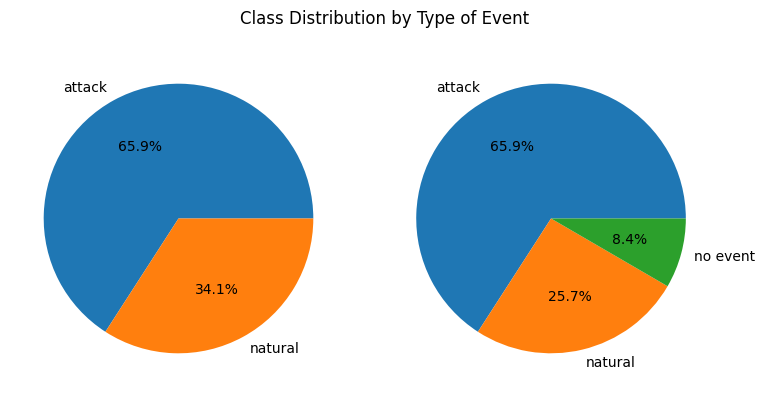

In [7]:
%matplotlib
# evidently most of the classes are attacks, followed by normal anomalies. the smallest class is normal baseline
binary_class_counts = df['is_attack'].value_counts()
tertiary_class_counts = df['scenario_class'].value_counts()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
fig.suptitle("Class Distribution by Type of Event")
ax1.pie(binary_class_counts, labels=['attack','natural'], autopct='%1.1f%%')
ax2.pie(tertiary_class_counts, labels=tertiary_class_counts.index, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

In [8]:
marker_pct = df['marker'].value_counts() / df.shape[0] * 100
marker_pct.sort_values(ascending=False).head(15)

marker
41    8.378645
35    6.875160
5     5.769441
36    5.225705
28    4.601686
2     4.262307
30    4.003211
3     3.817100
4     3.802503
6     3.579900
12    3.430281
11    2.806262
27    2.769770
29    2.755173
8     2.408495
Name: count, dtype: float64

# Pre-Processing

### Scaling Magnitude

* before creating waveform, log scale magnitude
* this is simply for better display - voltage is many times larger than current and power
* we will actually choose an appropriate scaler for modeling later

In [9]:
df.head()

,R1_voltage_AC_phase_A_angle,R1_voltage_AC_phase_A_magnitude,R1_voltage_AC_phase_B_angle,R1_voltage_AC_phase_B_magnitude,R1_voltage_AC_phase_C_angle,R1_voltage_AC_phase_C_magnitude,R1_current_AC_phase_A_angle,R1_current_AC_phase_A_magnitude,R1_current_AC_phase_B_angle,R1_current_AC_phase_B_magnitude,R1_current_AC_phase_C_angle,R1_current_AC_phase_C_magnitude,R1_pos_neg_zero_voltage_phase_A_angle,R1_pos_neg_zero_voltage_phase_A_magnitude,R1_pos_neg_zero_voltage_phase_B_angle,R1_pos_neg_zero_voltage_phase_B_magnitude,R1_pos_neg_zero_voltage_phase_C_angle,R1_pos_neg_zero_voltage_phase_C_magnitude,R1_pos_neg_zero_current_phase_A_angle,R1_pos_neg_zero_current_phase_A_magnitude,R1_pos_neg_zero_current_phase_B_angle,R1_pos_neg_zero_current_phase_B_magnitude,R1_pos_neg_zero_current_phase_C_angle,R1_pos_neg_zero_current_phase_C_magnitude,R1_frequency_for_relays,R1_frequency_delta_dFdt_for_relays,R1_appearance_impedance_for_relays,R1_appearance_impedance_angle_for_relays,R1_status_flag_for_relays,R2_voltage_AC_phase_A_angle,R2_voltage_AC_phase_A_magnitude,R2_voltage_AC_phase_B_angle,R2_voltage_AC_phase_B_magnitude,R2_voltage_AC_phase_C_angle,R2_voltage_AC_phase_C_magnitude,R2_current_AC_phase_A_angle,R2_current_AC_phase_A_magnitude,R2_current_AC_phase_B_angle,R2_current_AC_phase_B_magnitude,R2_current_AC_phase_C_angle,R2_current_AC_phase_C_magnitude,R2_pos_neg_zero_voltage_phase_A_angle,R2_pos_neg_zero_voltage_phase_A_magnitude,R2_pos_neg_zero_voltage_phase_B_angle,R2_pos_neg_zero_voltage_phase_B_magnitude,R2_pos_neg_zero_voltage_phase_C_angle,R2_pos_neg_zero_voltage_phase_C_magnitude,R2_pos_neg_zero_current_phase_A_angle,R2_pos_neg_zero_current_phase_A_magnitude,R2_pos_neg_zero_current_phase_B_angle,R2_pos_neg_zero_current_phase_B_magnitude,R2_pos_neg_zero_current_phase_C_angle,R2_pos_neg_zero_current_phase_C_magnitude,R2_frequency_for_relays,R2_frequency_delta_dFdt_for_relays,R2_appearance_impedance_for_relays,R2_appearance_impedance_angle_for_relays,R2_status_flag_for_relays,R3_voltage_AC_phase_A_angle,R3_voltage_AC_phase_A_magnitude,R3_voltage_AC_phase_B_angle,R3_voltage_AC_phase_B_magnitude,R3_voltage_AC_phase_C_angle,R3_voltage_AC_phase_C_magnitude,R3_current_AC_phase_A_angle,R3_current_AC_phase_A_magnitude,R3_current_AC_phase_B_angle,R3_current_AC_phase_B_magnitude,R3_current_AC_phase_C_angle,R3_current_AC_phase_C_magnitude,R3_pos_neg_zero_voltage_phase_A_angle,R3_pos_neg_zero_voltage_phase_A_magnitude,R3_pos_neg_zero_voltage_phase_B_angle,R3_pos_neg_zero_voltage_phase_B_magnitude,R3_pos_neg_zero_voltage_phase_C_angle,R3_pos_neg_zero_voltage_phase_C_magnitude,R3_pos_neg_zero_current_phase_A_angle,R3_pos_neg_zero_current_phase_A_magnitude,R3_pos_neg_zero_current_phase_B_angle,R3_pos_neg_zero_current_phase_B_magnitude,R3_pos_neg_zero_current_phase_C_angle,R3_pos_neg_zero_current_phase_C_magnitude,R3_frequency_for_relays,R3_frequency_delta_dFdt_for_relays,R3_appearance_impedance_for_relays,R3_appearance_impedance_angle_for_relays,R3_status_flag_for_relays,R4_voltage_AC_phase_A_angle,R4_voltage_AC_phase_A_magnitude,R4_voltage_AC_phase_B_angle,R4_voltage_AC_phase_B_magnitude,R4_voltage_AC_phase_C_angle,R4_voltage_AC_phase_C_magnitude,R4_current_AC_phase_A_angle,R4_current_AC_phase_A_magnitude,R4_current_AC_phase_B_angle,R4_current_AC_phase_B_magnitude,R4_current_AC_phase_C_angle,R4_current_AC_phase_C_magnitude,R4_pos_neg_zero_voltage_phase_A_angle,R4_pos_neg_zero_voltage_phase_A_magnitude,R4_pos_neg_zero_voltage_phase_B_angle,R4_pos_neg_zero_voltage_phase_B_magnitude,R4_pos_neg_zero_voltage_phase_C_angle,R4_pos_neg_zero_voltage_phase_C_magnitude,R4_pos_neg_zero_current_phase_A_angle,R4_pos_neg_zero_current_phase_A_magnitude,R4_pos_neg_zero_current_phase_B_angle,R4_pos_neg_zero_current_phase_B_magnitude,R4_pos_neg_zero_current_phase_C_angle,R4_pos_neg_zero_current_phase_C_magnitude,R4_frequency_for_relays,R4_frequency_delta_dFdt_for_relays,R4_appearance_impedance_for_relays,R4_appearance_impedance_angle_for_relays,R4_status_flag_for_re

In [10]:
s = Signal(df)
s.log_scale_transform(dp.magnitudes)
df = s.data
df.head()

,R1_voltage_AC_phase_A_angle,R1_voltage_AC_phase_A_magnitude,R1_voltage_AC_phase_B_angle,R1_voltage_AC_phase_B_magnitude,R1_voltage_AC_phase_C_angle,R1_voltage_AC_phase_C_magnitude,R1_current_AC_phase_A_angle,R1_current_AC_phase_A_magnitude,R1_current_AC_phase_B_angle,R1_current_AC_phase_B_magnitude,R1_current_AC_phase_C_angle,R1_current_AC_phase_C_magnitude,R1_pos_neg_zero_voltage_phase_A_angle,R1_pos_neg_zero_voltage_phase_A_magnitude,R1_pos_neg_zero_voltage_phase_B_angle,R1_pos_neg_zero_voltage_phase_B_magnitude,R1_pos_neg_zero_voltage_phase_C_angle,R1_pos_neg_zero_voltage_phase_C_magnitude,R1_pos_neg_zero_current_phase_A_angle,R1_pos_neg_zero_current_phase_A_magnitude,R1_pos_neg_zero_current_phase_B_angle,R1_pos_neg_zero_current_phase_B_magnitude,R1_pos_neg_zero_current_phase_C_angle,R1_pos_neg_zero_current_phase_C_magnitude,R1_frequency_for_relays,R1_frequency_delta_dFdt_for_relays,R1_appearance_impedance_for_relays,R1_appearance_impedance_angle_for_relays,R1_status_flag_for_relays,R2_voltage_AC_phase_A_angle,R2_voltage_AC_phase_A_magnitude,R2_voltage_AC_phase_B_angle,R2_voltage_AC_phase_B_magnitude,R2_voltage_AC_phase_C_angle,R2_voltage_AC_phase_C_magnitude,R2_current_AC_phase_A_angle,R2_current_AC_phase_A_magnitude,R2_current_AC_phase_B_angle,R2_current_AC_phase_B_magnitude,R2_current_AC_phase_C_angle,R2_current_AC_phase_C_magnitude,R2_pos_neg_zero_voltage_phase_A_angle,R2_pos_neg_zero_voltage_phase_A_magnitude,R2_pos_neg_zero_voltage_phase_B_angle,R2_pos_neg_zero_voltage_phase_B_magnitude,R2_pos_neg_zero_voltage_phase_C_angle,R2_pos_neg_zero_voltage_phase_C_magnitude,R2_pos_neg_zero_current_phase_A_angle,R2_pos_neg_zero_current_phase_A_magnitude,R2_pos_neg_zero_current_phase_B_angle,R2_pos_neg_zero_current_phase_B_magnitude,R2_pos_neg_zero_current_phase_C_angle,R2_pos_neg_zero_current_phase_C_magnitude,R2_frequency_for_relays,R2_frequency_delta_dFdt_for_relays,R2_appearance_impedance_for_relays,R2_appearance_impedance_angle_for_relays,R2_status_flag_for_relays,R3_voltage_AC_phase_A_angle,R3_voltage_AC_phase_A_magnitude,R3_voltage_AC_phase_B_angle,R3_voltage_AC_phase_B_magnitude,R3_voltage_AC_phase_C_angle,R3_voltage_AC_phase_C_magnitude,R3_current_AC_phase_A_angle,R3_current_AC_phase_A_magnitude,R3_current_AC_phase_B_angle,R3_current_AC_phase_B_magnitude,R3_current_AC_phase_C_angle,R3_current_AC_phase_C_magnitude,R3_pos_neg_zero_voltage_phase_A_angle,R3_pos_neg_zero_voltage_phase_A_magnitude,R3_pos_neg_zero_voltage_phase_B_angle,R3_pos_neg_zero_voltage_phase_B_magnitude,R3_pos_neg_zero_voltage_phase_C_angle,R3_pos_neg_zero_voltage_phase_C_magnitude,R3_pos_neg_zero_current_phase_A_angle,R3_pos_neg_zero_current_phase_A_magnitude,R3_pos_neg_zero_current_phase_B_angle,R3_pos_neg_zero_current_phase_B_magnitude,R3_pos_neg_zero_current_phase_C_angle,R3_pos_neg_zero_current_phase_C_magnitude,R3_frequency_for_relays,R3_frequency_delta_dFdt_for_relays,R3_appearance_impedance_for_relays,R3_appearance_impedance_angle_for_relays,R3_status_flag_for_relays,R4_voltage_AC_phase_A_angle,R4_voltage_AC_phase_A_magnitude,R4_voltage_AC_phase_B_angle,R4_voltage_AC_phase_B_magnitude,R4_voltage_AC_phase_C_angle,R4_voltage_AC_phase_C_magnitude,R4_current_AC_phase_A_angle,R4_current_AC_phase_A_magnitude,R4_current_AC_phase_B_angle,R4_current_AC_phase_B_magnitude,R4_current_AC_phase_C_angle,R4_current_AC_phase_C_magnitude,R4_pos_neg_zero_voltage_phase_A_angle,R4_pos_neg_zero_voltage_phase_A_magnitude,R4_pos_neg_zero_voltage_phase_B_angle,R4_pos_neg_zero_voltage_phase_B_magnitude,R4_pos_neg_zero_voltage_phase_C_angle,R4_pos_neg_zero_voltage_phase_C_magnitude,R4_pos_neg_zero_current_phase_A_angle,R4_pos_neg_zero_current_phase_A_magnitude,R4_pos_neg_zero_current_phase_B_angle,R4_pos_neg_zero_current_phase_B_magnitude,R4_pos_neg_zero_current_phase_C_angle,R4_pos_neg_zero_current_phase_C_magnitude,R4_frequency_for_relays,R4_frequency_delta_dFdt_for_relays,R4_appearance_impedance_for_relays,R4_appearance_impedance_angle_for_relays,R4_status_flag_for_re

# Sensor Data - What does an event actually look like?

Wave form representing real time signal: $$x(t) = X_m\cos(\omega t + \phi)$$

Where $X_m$ is the magnitude, $\omega$ is $2\pi$ times the frequency, and $\phi$ is the angle. This is valid for voltage and current.

In synchrophasor notation, the magnitude is not given directly. It is typically reported as RMS value, which is based on the integral of the waveform and simplified to $\frac{X_{max}}{\sqrt{2}}$.

Power can also be shown as a waveform; it is the product of voltage and current.
$$p(t) = v(t) \times i(t)$$

### Visualize Voltage, Power, Current for One Sample

In [11]:
sample_bag = df['sample_id'].unique()
# choice = np.random.choice(sample_bag, 1)[0]

In [12]:
# pick 1 sample
choice = df['sample_id'].min() # known "no event"
sample = df.loc[df['sample_id'] == choice,:]
s = Signal(sample)
sample_class = sample['scenario_class'].unique()[0]

In [13]:
# lets just make waves for one phase from R1 sensor
relays, phases = ('R1',), ('A',)
sample_df = s.make_waves_iter(relays, phases, zero=False)
sample_df = sample_df.head()

Using matplotlib backend: module://matplotlib_inline.backend_inline


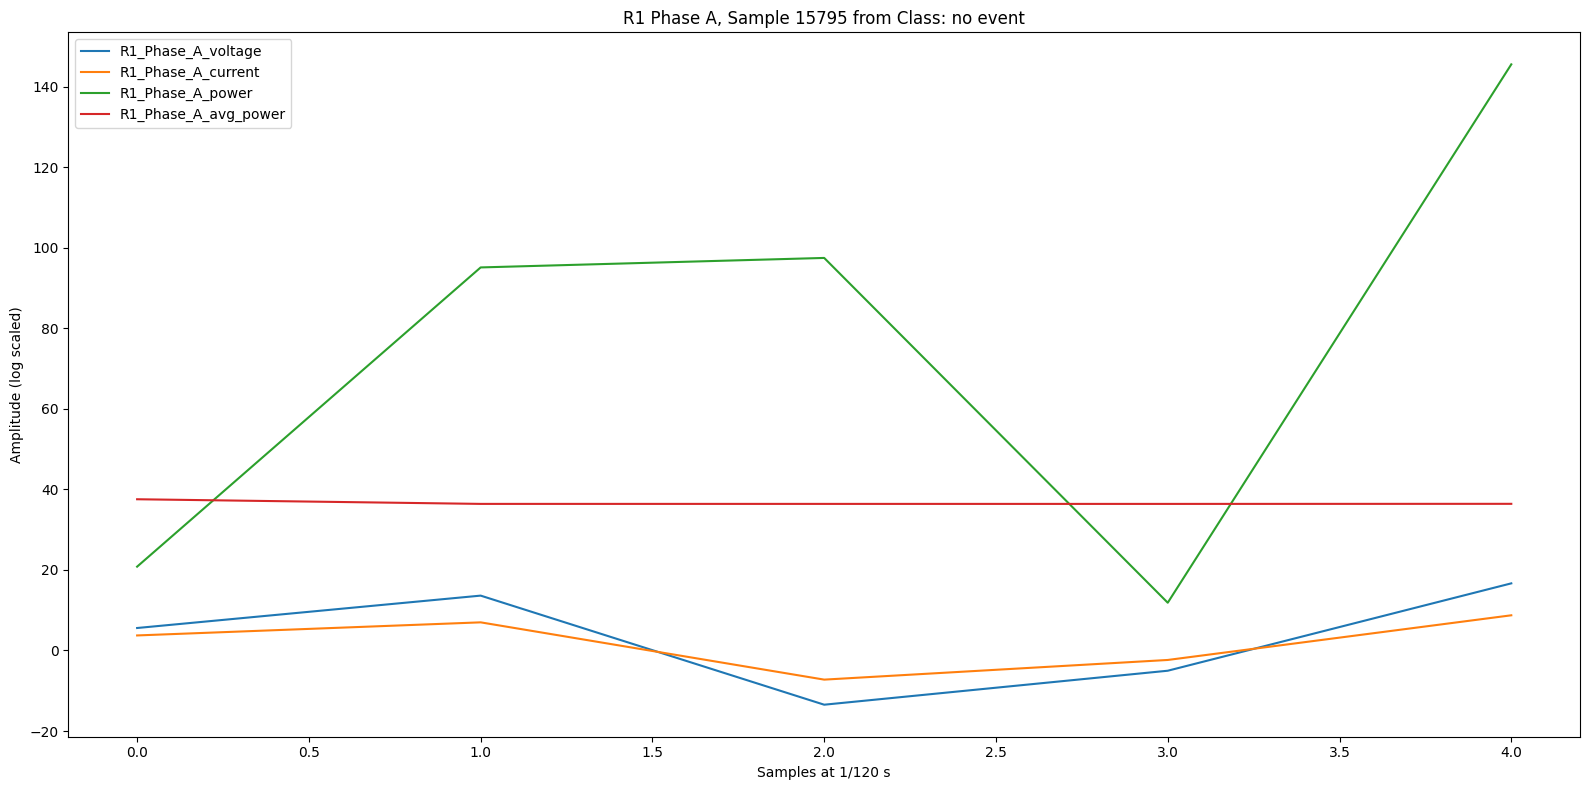

In [14]:
%matplotlib
t = np.linspace(0, len(sample), s.timespan)

plt.figure(figsize=(16, 8))

for col in sample_df.columns:
    plt.plot(sample_df[col],label=col)

plt.ylabel('Amplitude (log scaled)')
plt.xlabel('Samples at 1/120 s')
plt.title(f'R1 Phase A, Sample {choice} from Class: {sample_class}')
plt.legend()
plt.tight_layout()
plt.show()

### Visualize Relationship between A,B,C Phases

In [15]:
# reset
sample = df.loc[df['sample_id'] == choice,:]
s = Signal(sample)

In [16]:
# make phases for one sensor, 3 phases
phases = ('A','B','C')
relays = ('R1',)
sample_df = s.make_waves_iter(relays, phases, zero=False)
sample_df.head()

,R1_Phase_A_voltage,R1_Phase_A_current,R1_Phase_A_power,R1_Phase_A_avg_power,R1_Phase_B_voltage,R1_Phase_B_current,R1_Phase_B_power,R1_Phase_B_avg_power,R1_Phase_C_voltage,R1_Phase_C_current,R1_Phase_C_power,R1_Phase_C_avg_power
0,5.577820,3.730979,20.810725,37.545229,10.782385,4.961536,53.497199,37.552507,-16.353491,-8.998068,147.149816,37.547712
1,13.618754,6.983181,95.102223,36.392718,-15.111968,-8.252665,124.714011,36.498553,1.485109,0.962542,1.429480,36.378749
2,-13.464897,-7.238048,97.459572,36.391871,-1.761447,-0.216792,0.381868,36.498555,15.227874,7.910963,120.467149,36.374872
3,-5.029398,-2.357017,11.854376,36.389378,16.269510,8.407461,136.785274,36.489819,-11.232610,-6.047805,67.932630,36.383049
4,16.662912,8.733290,145.522035,36.409024,-8.526046,-5.084322,43.349164,36.481846,-8.137143,-3.996809,32.522606,36.422834


Using matplotlib backend: module://matplotlib_inline.backend_inline


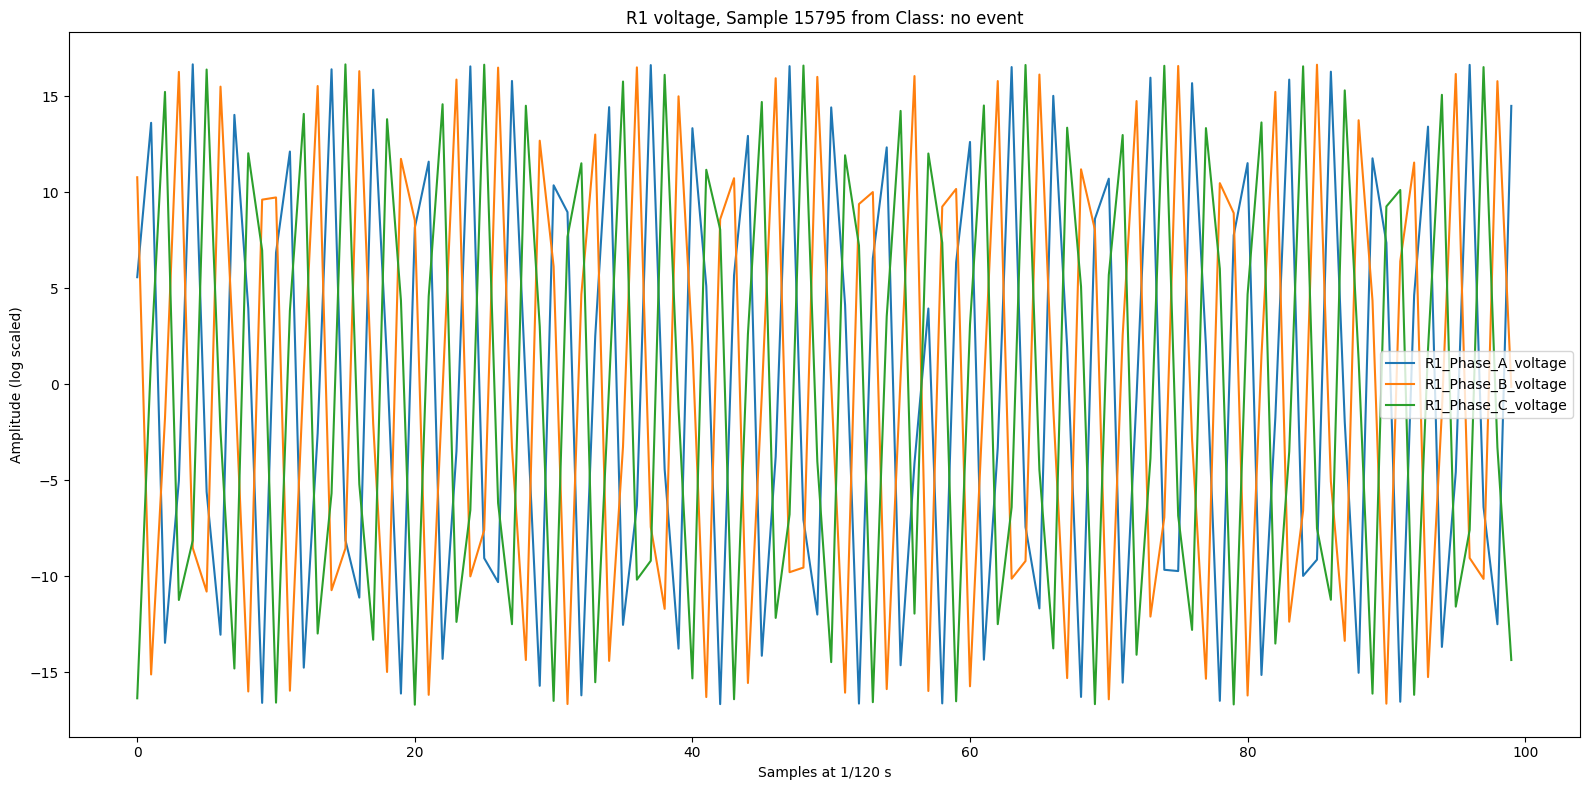

In [17]:
%matplotlib
t = np.linspace(0, len(sample), s.timespan)

plt.figure(figsize=(16, 8))

filt = 'voltage'
for col in sample_df.columns:
    if filt in col:
        plt.plot(sample_df[col][0:100],label=col)

plt.ylabel('Amplitude (log scaled)')
plt.xlabel('Samples at 1/120 s')
plt.title(f'R1 {filt}, Sample {choice} from Class: {sample_class}')
plt.legend()
plt.tight_layout()
plt.show()

Using matplotlib backend: module://matplotlib_inline.backend_inline


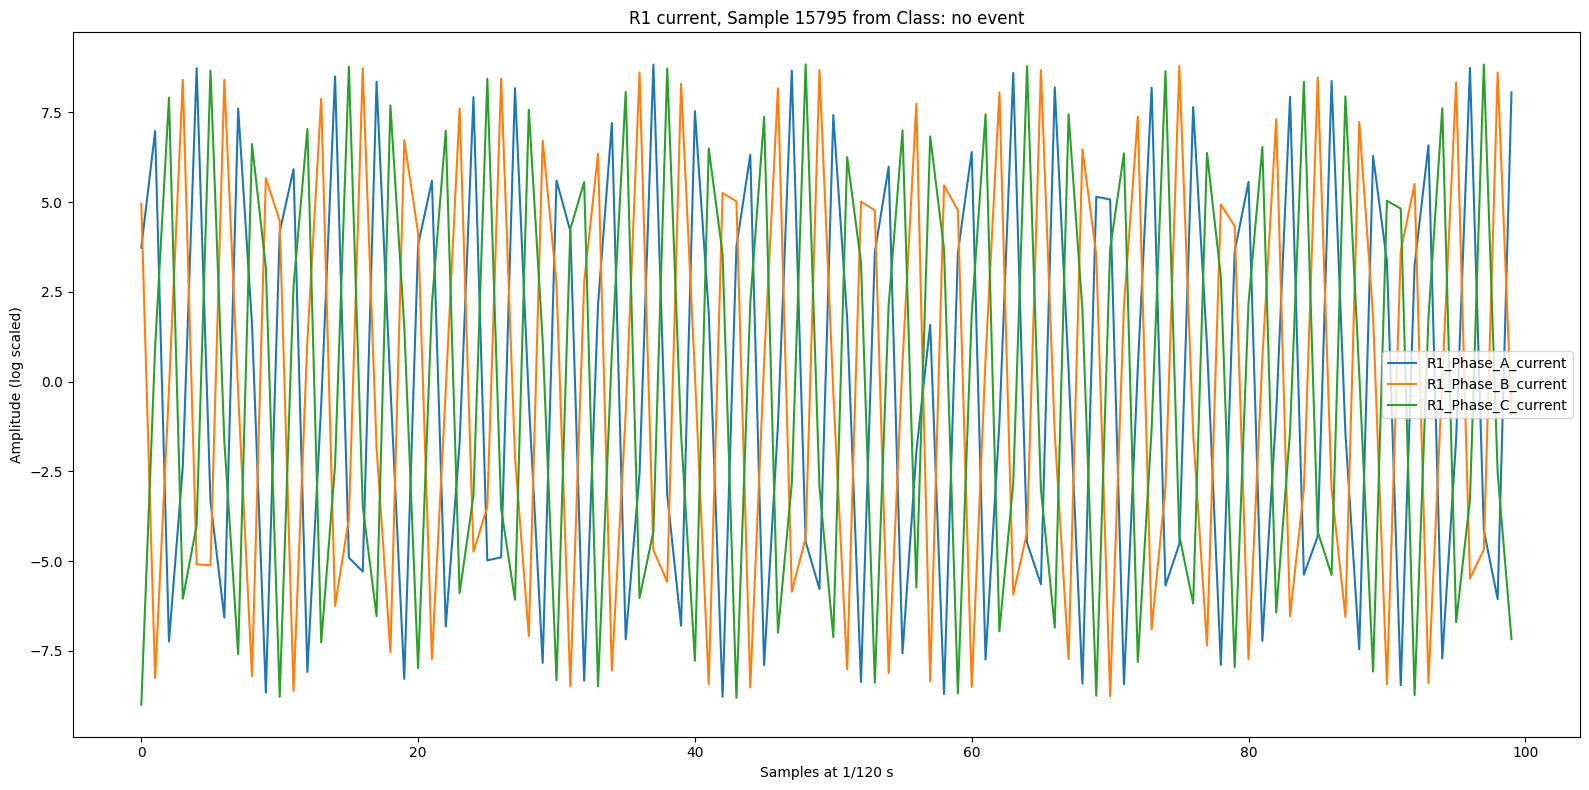

In [18]:
%matplotlib
plt.figure(figsize=(16, 8))

filt = 'current'
for col in sample_df.columns:
    if filt in col:
        plt.plot(sample_df[col][0:100],label=col)

plt.ylabel('Amplitude (log scaled)')
plt.xlabel('Samples at 1/120 s')
plt.title(f'R1 {filt}, Sample {choice} from Class: {sample_class}')
plt.legend()
plt.tight_layout()
plt.show()

Using matplotlib backend: module://matplotlib_inline.backend_inline


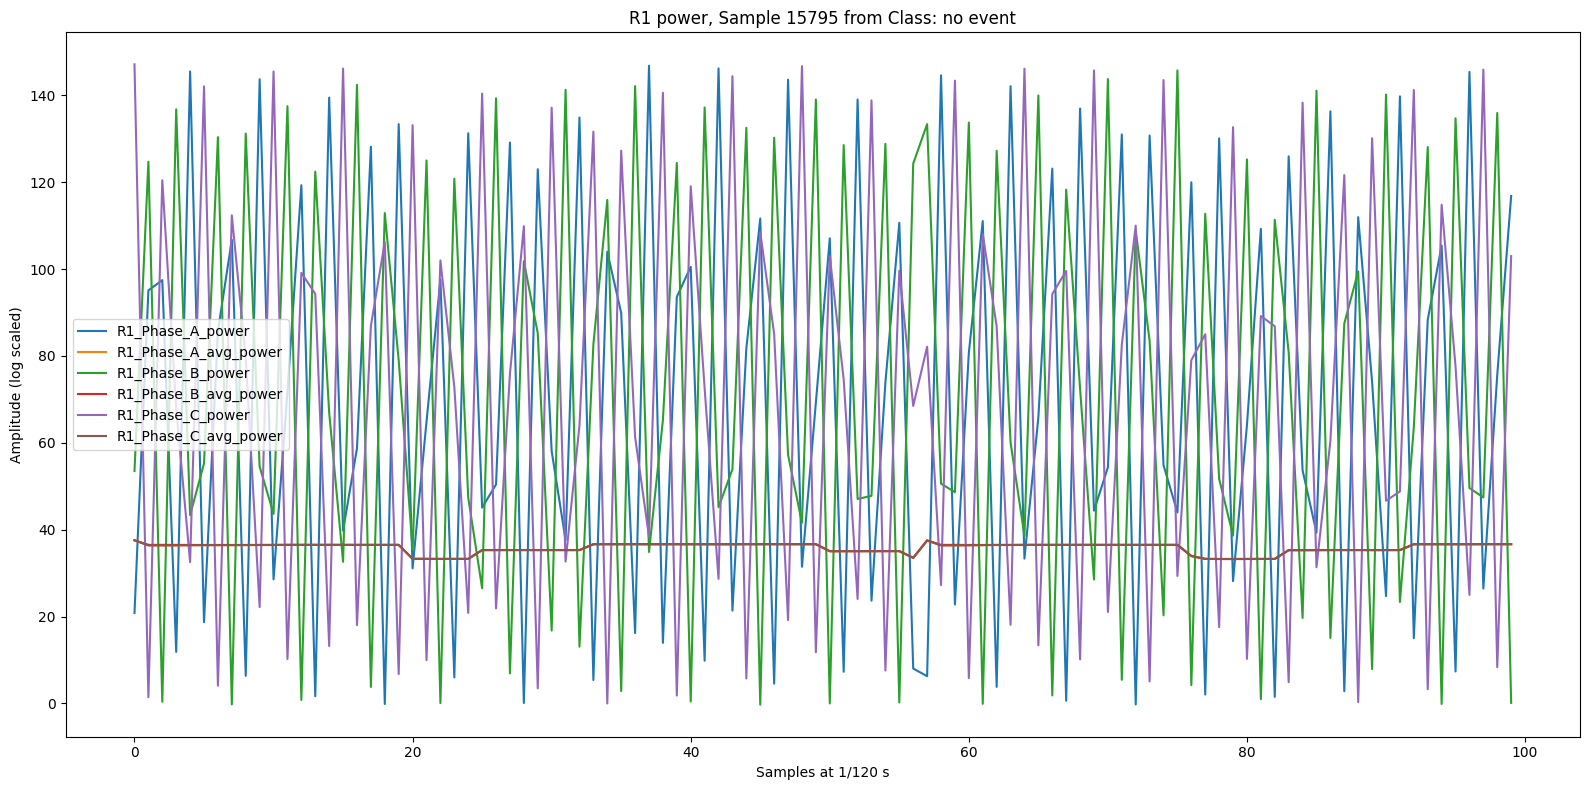

In [19]:
%matplotlib
plt.figure(figsize=(16, 8))

filt = 'power'
for col in sample_df.columns:
    if filt in col:
        plt.plot(sample_df[col][0:100],label=col)

plt.ylabel('Amplitude (log scaled)')
plt.xlabel('Samples at 1/120 s')
plt.title(f'R1 {filt}, Sample {choice} from Class: {sample_class}')
plt.legend()
plt.tight_layout()
plt.show()

### Compare/Contrast Waveforms for Each Class

##### Attack/No Attack

Using matplotlib backend: module://matplotlib_inline.backend_inline


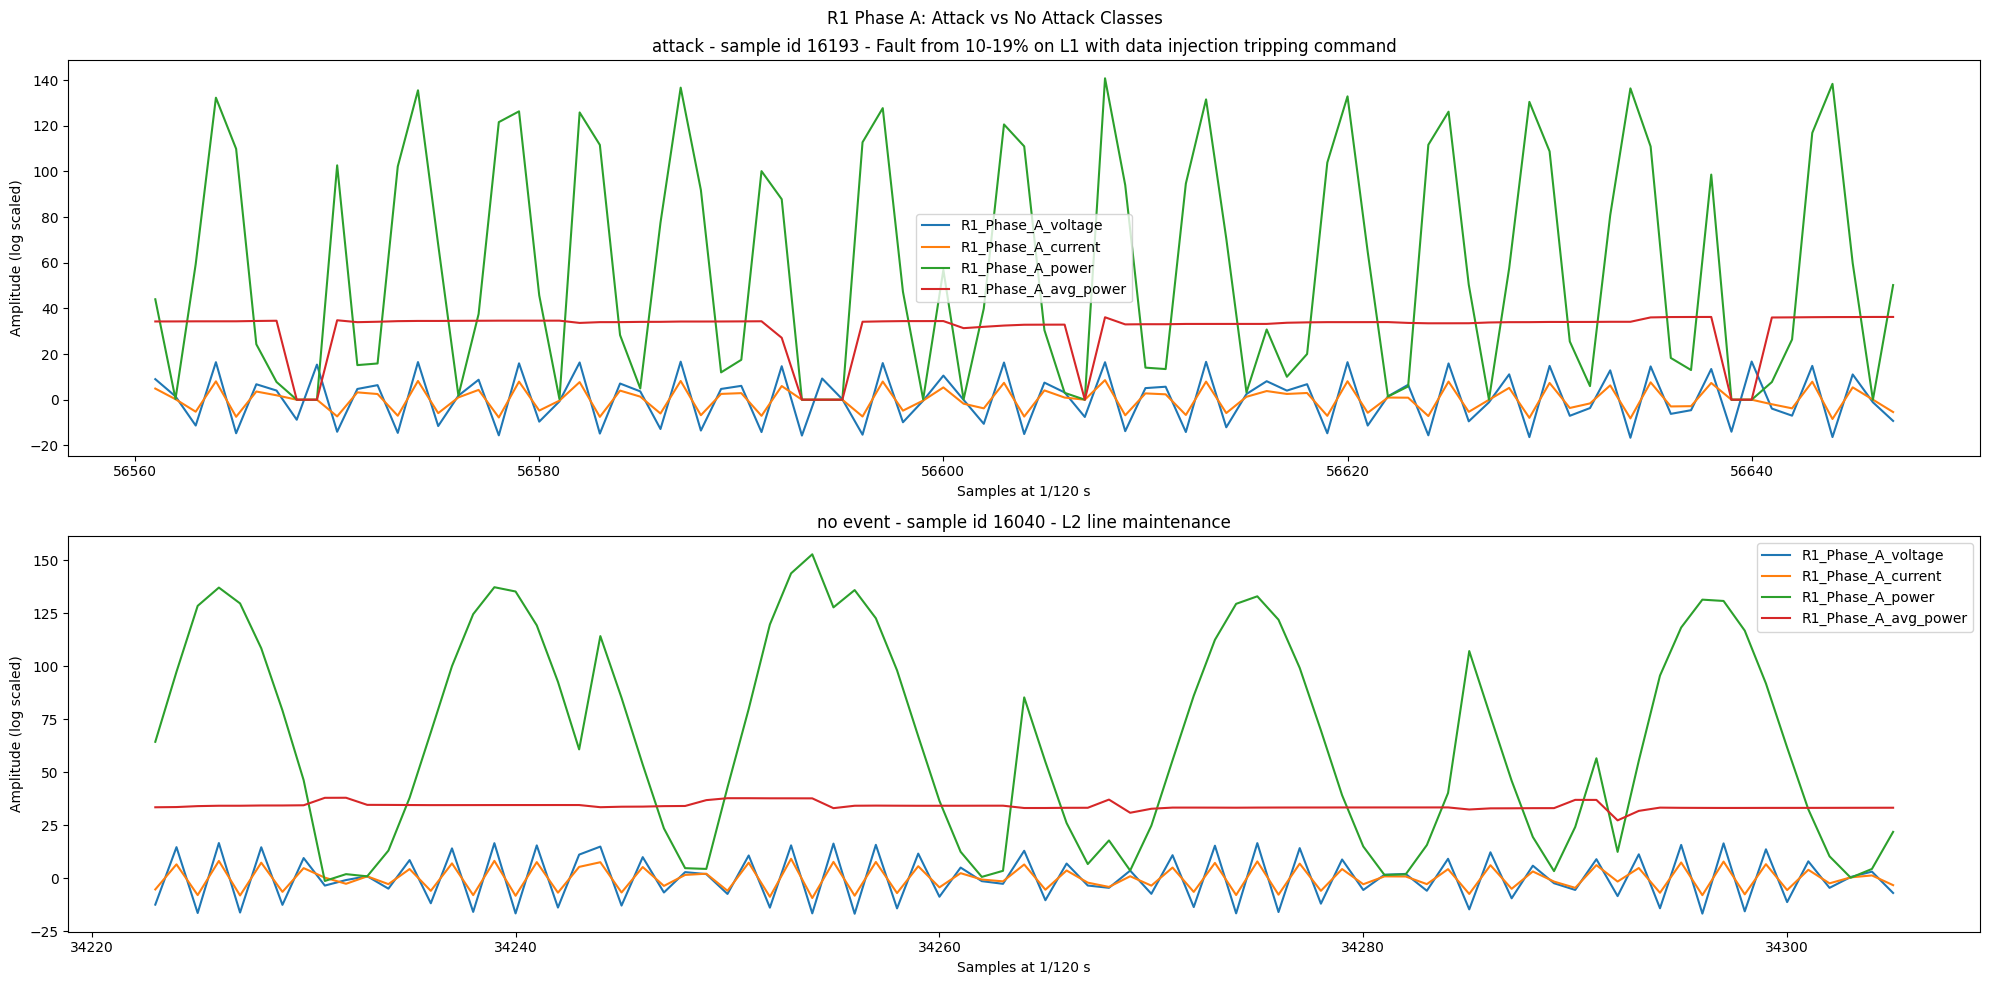

In [23]:
%matplotlib

# SAMPLE
attack_ids = df.loc[df['is_attack']==True,'sample_id'].unique()
no_attack_ids = df.loc[df['is_attack']==False,'sample_id'].unique()
attack_choice, no_attack_choice = np.random.choice(attack_ids,1)[0], np.random.choice(no_attack_ids,1)[0]
# attack_choice, no_attack_choice = attack_ids.min(), no_attack_ids.min()

# SUBSET DATA
relays, phases = ('R1',), ('A',)
attack_df, no_attack_df = df.loc[df['sample_id']==attack_choice,:], df.loc[df['sample_id']==no_attack_choice,:]
# attack_df, no_attack_df = df.loc[df['is_attack']==True,:], df.loc[df['is_attack']==False,:]

event_detail = {i: df.loc[df['sample_id']==i,'scenario_type'].unique()[0] for i in [attack_choice, no_attack_choice]}

# MAKE WAVES
sig_attack, sig_no_attack = Signal(attack_df), Signal(no_attack_df)
attack_wave_df, no_attack_wave_df = sig_attack.make_waves_iter(relays, phases, zero=False), sig_no_attack.make_waves_iter(relays, phases, zero=False)

# PLOT
title = 'R1 Phase A: Attack vs No Attack Classes'
class_dfs = [attack_wave_df, no_attack_wave_df]
class_names = [ f'attack - sample id {attack_choice} - {event_detail[attack_choice]}', \
                f'no event - sample id {no_attack_choice} - {event_detail[no_attack_choice]}' ]
                
fig, ax = plt.subplots(len(class_dfs),1, figsize=(10*len(class_dfs), 10))

for i in range(len(class_dfs)):
    dff = class_dfs[i]
    t = np.linspace(0, len(dff), df.shape[0])
    for col in dff.columns:
        ax[i].plot(dff[col],label=col)
        ax[i].set_ylabel('Amplitude (log scaled)')
        ax[i].set_xlabel('Samples at 1/120 s')
        ax[i].set_title(class_names[i])
        ax[i].legend()

plt.suptitle(title)
plt.tight_layout()
plt.show()

### Attack/Natural/No Event

In [ ]:
df['scenario_class'].unique()

Using matplotlib backend: module://matplotlib_inline.backend_inline


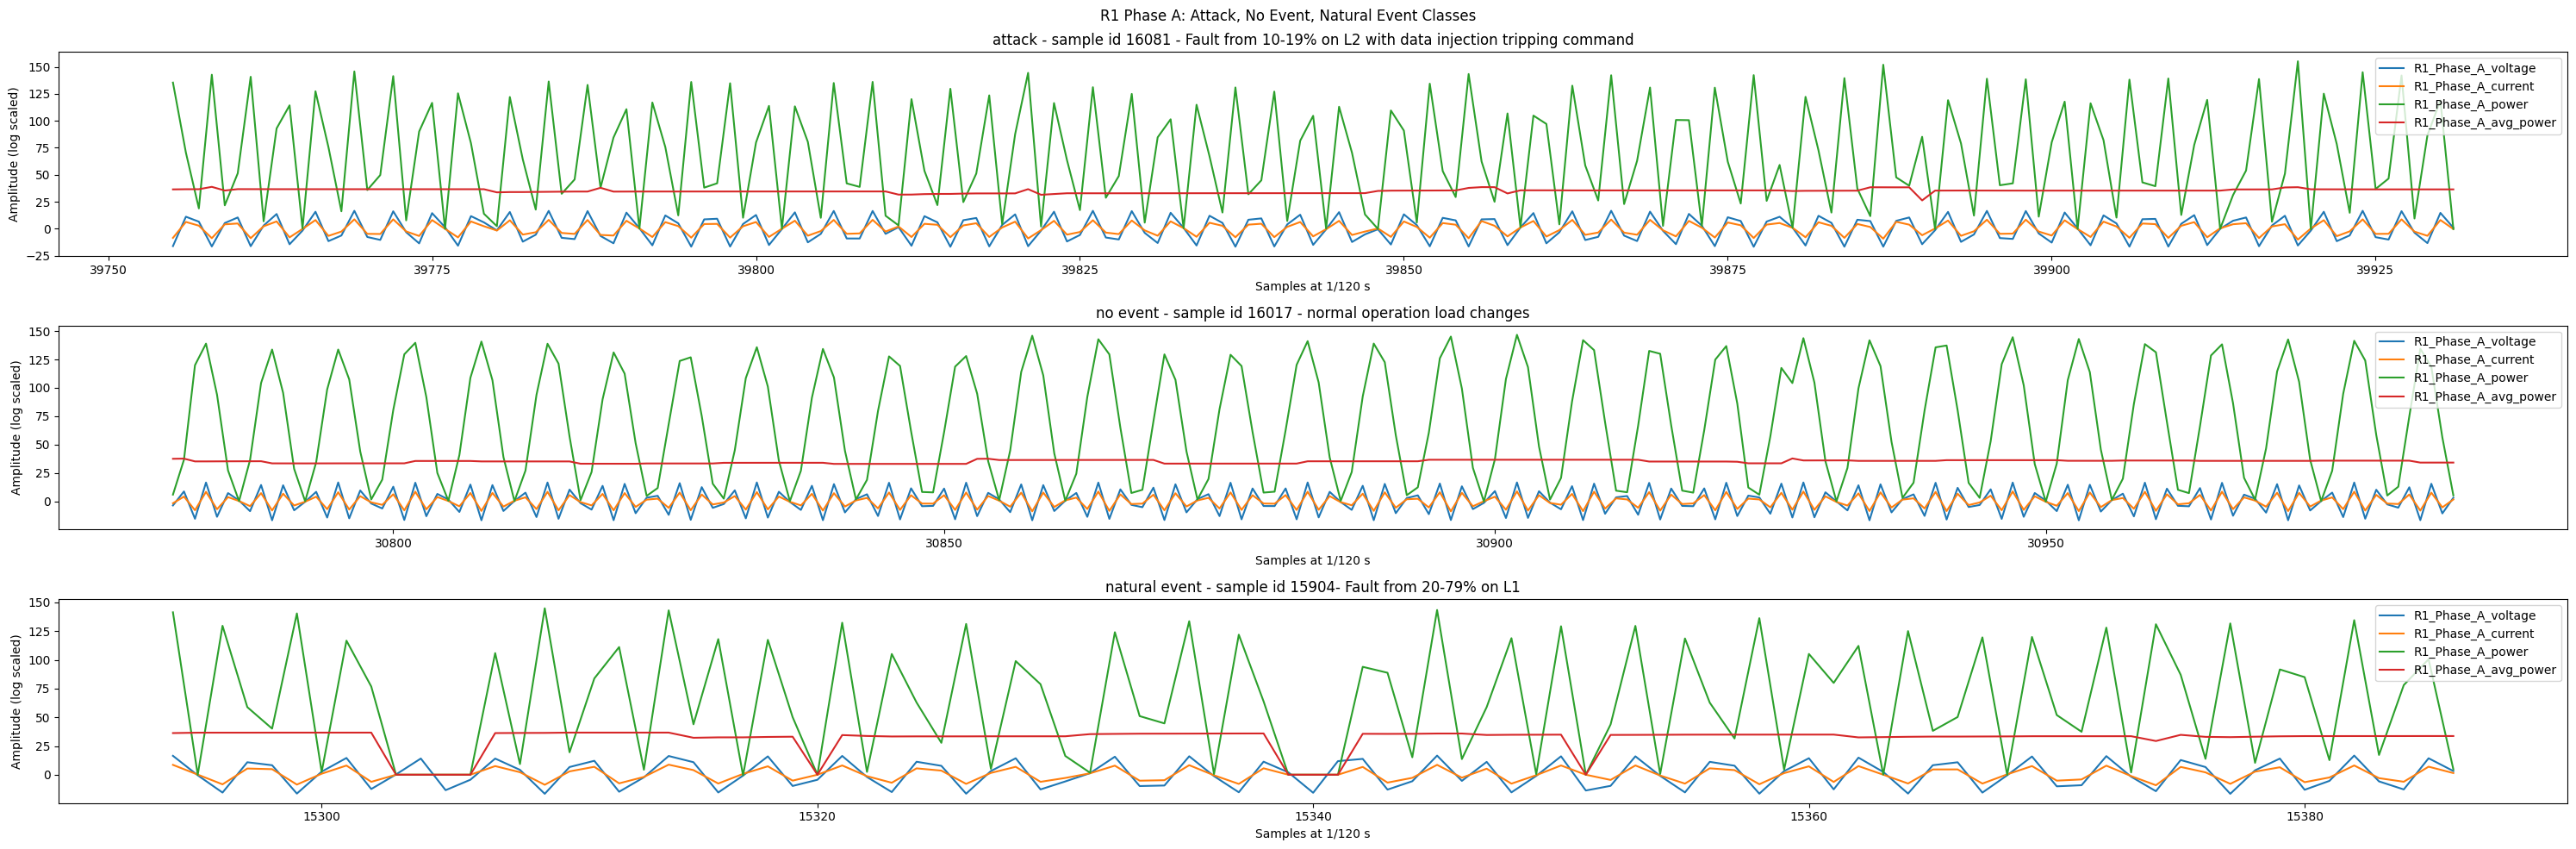

In [26]:
%matplotlib

# SAMPLE
attack_ids = df.loc[df['scenario_class']=='attack','sample_id'].unique()
no_attack_ids = df.loc[df['scenario_class']=='no event','sample_id'].unique()
natural_ids = df.loc[df['scenario_class']=='natural','sample_id'].unique()
attack_choice, no_attack_choice, natural_choice = np.random.choice(attack_ids,1)[0], np.random.choice(no_attack_ids,1)[0], np.random.choice(natural_ids,1)[0]

# SUBSET DATA
relays, phases = ('R1',), ('A',)
attack_df, no_attack_df, natural_df = df.loc[df['sample_id']==attack_choice,:], df.loc[df['sample_id']==no_attack_choice,:], df.loc[df['sample_id']==natural_choice,:]
event_detail = {i: df.loc[df['sample_id']==i,'scenario_type'].unique()[0] for i in [attack_choice, no_attack_choice, natural_choice]}

# MAKE WAVES
sig_attack, sig_no_attack, sig_natural = Signal(attack_df), Signal(no_attack_df), Signal(natural_df)
attack_wave_df, no_attack_wave_df, natural_wave_df = sig_attack.make_waves_iter(relays, phases, zero=False), sig_no_attack.make_waves_iter(relays, phases, zero=False), \
    sig_natural.make_waves_iter(relays, phases, zero=False)

# PLOT
title = 'R1 Phase A: Attack, No Event, Natural Event Classes'
class_dfs = [attack_wave_df, no_attack_wave_df, natural_wave_df]
class_names = [ f'attack - sample id {attack_choice} - {event_detail[attack_choice]}',      \
                f'no event - sample id {no_attack_choice} - {event_detail[no_attack_choice]}', \
                f'natural event - sample id {natural_choice}- {event_detail[natural_choice]}' ]

fig, ax = plt.subplots(len(class_dfs),1, figsize=(10*len(class_dfs), 10))

for i in range(len(class_dfs)):
    dff = class_dfs[i]
    t = np.linspace(0, len(dff), df.shape[0])
    for col in dff.columns:
        ax[i].plot(dff[col],label=col)
        ax[i].set_ylabel('Amplitude (log scaled)')
        ax[i].set_xlabel('Samples at 1/120 s')
        ax[i].set_title(class_names[i])
        ax[i].legend()

plt.suptitle(title)
plt.tight_layout()
plt.show()

# Time Series Descriptive EDA